In [12]:
import pandas as pd
import numpy as np

##### [과제] 1) str -> datetiem, 2) datetime -> str -> timestamp, 3) timestamp -> str -> datetime

In [23]:
import datetime, time
# str -> datetime
s = '2013-12-24 13:12:24'
dt = datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

# timestamp -> str -> datetime
tm = time.time()
stm = str(tm)
print(stm,type(stm))
dtm = datetime.datetime.fromtimestamp(float(stm))
print(dtm,type(dtm))

# datetime -> str -> timestamp
st = str(dt)
print(st,type(st))
tst = time.mktime(datetime.datetime.strptime(st,'%Y-%m-%d %H:%M:%S').timetuple())
print(tst,type(tst))

AttributeError: module 'datetime' has no attribute 'strptime'

In [24]:
import datetime
from datetime import datetime
import time

# str -> datetime
s = '2022-01-17 14:14:22' 
dt = datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
print(dt, type(dt), '\n')

# datetime - > str -> timestamp
a = datetime.now()
b = str(a)
print(b, type(b), '\n')

c = time.mktime(datetime.strptime(b,'%Y-%m-%d %H:%M:%S.%f').timetuple())
print(c, type(c), '\n')

# timestamp -> str -> datetime
today = time.time()
print(today, type(today), '\n')

t = datetime.fromtimestamp(today)
print(t, type(t), '\n')

s = str(t)
print(s, type(s))

z = datetime.strptime(s, '%Y-%m-%d %H:%M:%S.%f')
print(z, type(z))

2022-01-17 14:14:22 <class 'datetime.datetime'> 

2022-01-20 16:17:56.522532 <class 'str'> 

1642663076.0 <class 'float'> 

1642663076.5225327 <class 'float'> 

2022-01-20 16:17:56.522533 <class 'datetime.datetime'> 

2022-01-20 16:17:56.522533 <class 'str'>
2022-01-20 16:17:56.522533 <class 'datetime.datetime'>


##### [과제] 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요

In [15]:
df = pd.read_csv('D:/python/cakd5/m2_분석라이브러리 활용/pandas/auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
new_df = df.copy()
mpg_to_kpl = 1.60934 / 3.78541

# new_df['kpl'] = (new_df.mpg * mpg_to_kpl)
new_df['kpl'] = (new_df.mpg * mpg_to_kpl)
new_df[['mpg', 'kpl']].head(3).round(2)

,mpg,kpl
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65


In [17]:
new_df = df.copy()
new_df['kpl'] = (new_df.mpg / 2.352)
new_df.round(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.7
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.4
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.7
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.8
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.2
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.5
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.7
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.6
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.9


##### [과제] horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요(자료형 타입이 문자로 되어있는 이유 및 float로 처리)
##### (hint : np.nan으로 대체)

In [19]:
df.info()
df.horsepower.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [21]:
df1 = df.copy()
# df1.horsepower = df1.horsepower.replace('?',np.nan)
sr1 = pd.to_numeric(df1.horsepower, errors = 'coerce')
df1['horsepower'] = sr1
print(df1.horsepower.isnull().sum())

df_sorted = df1.sort_values(by='horsepower',ascending = False)
df_sorted

6


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
116,16.0,8,400.0,230.0,4278,9.5,73,1,pontiac grand prix
95,12.0,8,455.0,225.0,4951,11.0,73,1,buick electra 225 custom
13,14.0,8,455.0,225.0,3086,10.0,70,1,buick estate wagon (sw)
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [22]:
df1.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

##### [과제] horsepower 열의 자료형 타입 문제를 해결하고 NAN 값의 개수를 NAN값 삭제 전 후로 비교하세요.

In [9]:
df1.horsepower = df1.horsepower.astype(float)
print(df1.info(), '\n')
print(df1.horsepower.isnull().sum(), '\n')
df2 = df1.dropna(subset = ['horsepower'], axis = 0) # 누락데이터 삭제
print(df2.info(), '\n')
print(df2.horsepower.isnull().sum())

NameError: name 'df1' is not defined

##### [과제] auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요.

In [10]:
import csv
import pickle

df.to_pickle('auto_df.pkl') # 저장
df3 = pd.read_pickle('auto_df.pkl') # 불러오기
df3

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


##### [과제] horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.

In [11]:
df_max = df2.horsepower.max()
df_max
df_div = df2['horsepower']/abs(df_max)
df_div

NameError: name 'df2' is not defined

##### [과제] horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장하세요

In [170]:
def cal(x):
    return(x - x.min()) / (x.max() - x.min())
df2['cal'] = df2.horsepower.pipe(cal)
df2

C:\Users\spiner\AppData\Local\Temp/ipykernel_3192/2950343875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cal'] = df2.horsepower.pipe(cal)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,cal,hp_bin
0,18.0,8,307.0,0.456522,3504,12.0,70,USA,chevrolet chevelle malibu,0.456522,보통출력
1,15.0,8,350.0,0.646739,3693,11.5,70,USA,buick skylark 320,0.646739,보통출력
2,18.0,8,318.0,0.565217,3436,11.0,70,USA,plymouth satellite,0.565217,보통출력
3,16.0,8,304.0,0.565217,3433,12.0,70,USA,amc rebel sst,0.565217,보통출력
4,17.0,8,302.0,0.510870,3449,10.5,70,USA,ford torino,0.510870,보통출력
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,0.217391,2790,15.6,82,USA,ford mustang gl,0.217391,저출력
394,44.0,4,97.0,0.032609,2130,24.6,82,EU,vw pickup,0.032609,저출력
395,32.0,4,135.0,0.206522,2295,11.6,82,USA,dodge rampage,0.206522,저출력
396,28.0,4,120.0,0.179348,2625,18.6,82,USA,ford ranger,0.179348,저출력


In [133]:
a = min(df2.horsepower)
b = max(df2.horsepower)
df2.horsepower = df2.horsepower.apply(lambda x: (x-a) / (b-a)) # minmaxscaler
df2.horsepower.head()

C:\Users\spiner\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64

<AxesSubplot:>

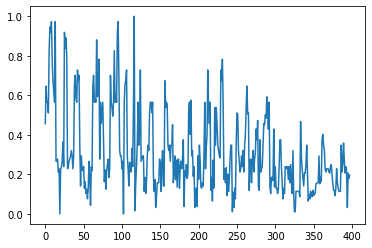

In [134]:
df2.horsepower.plot()

##### [과제] origin열의 고유값을 출력하세요

In [152]:
df2.origin.unique()

array(['USA', 'JAPAN', 'EU'], dtype=object)

##### [과제] 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요(1:'USA',2:'EU',3:'JAPAN')

In [154]:
df = pd.read_pickle('auto_df.pkl') # 불러오기
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [140]:
df2['origin'].replace({1: 'USA', 2: 'EU', 3: 'JAPAN'}, inplace = True)
print(df2['origin'].unique())

['USA' 'JAPAN' 'EU']


##### [과제] origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요.

In [150]:
df['origin'] = df.origin.astype('category')
print(df.origin.dtype)
df

category


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


##### [과제] origin열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.

In [145]:
df['origin'] = df.origin.astype(str)
print(df.origin, df.origin.dtype)

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: object object


##### [과제] hrosepower를 3개의 bin으로 나누고 bin_names = ['저출력','보통출력','고출력']으로 출력하세요.
##### np.histogram() 함수로 3개의 bin으로 나눔

In [177]:
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,hp_bin
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,보통출력
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,보통출력
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,보통출력
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,보통출력
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,보통출력
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,저출력
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,저출력
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,저출력
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,저출력


In [189]:
count, bin_dividers = np.histogram(df2.horsepower,bins = 3)
print(bin_dividers)

bin_names = ['저출력','보통출력','고출력']
df2['hp_bin'] = pd.cut(x = df2.horsepower,  # 데이터 배열
                bins = bin_dividers,        # 경계값 리스트
                labels = bin_names,         # bin 이름
                include_lowest = True)      # 첫 경계값 포함
df2[['horsepower', 'hp_bin']]

[0.2        0.46666667 0.73333333 1.        ]


C:\Users\spiner\AppData\Local\Temp/ipykernel_3192/1928843178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hp_bin'] = pd.cut(x = df2.horsepower,  # 데이터 배열


,horsepower,hp_bin
0,0.565217,보통출력
1,0.717391,보통출력
2,0.652174,보통출력
3,0.652174,보통출력
4,0.608696,보통출력
...,...,...
393,0.373913,저출력
394,0.226087,저출력
395,0.365217,저출력
396,0.343478,저출력


##### [과제] horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요

In [180]:
df2['horsepower'] = df2['horsepower'] / abs(df2['horsepower'].max())
df2[['horsepower']].describe()

C:\Users\spiner\AppData\Local\Temp/ipykernel_3192/1440000036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['horsepower'] = df2['horsepower'] / abs(df2['horsepower'].max())


,horsepower
count,392.000000
mean,0.454215
std,0.167353
min,0.200000
25%,0.326087
50%,0.406522
75%,0.547826
max,1.000000
